# Interpolation experiments

Testing xarray `interp` method and its interactions with Dask.

Example adapted from https://docs.xarray.dev/en/stable/generated/xarray.DataArray.interp.html

In [1]:
import numpy as np
import xarray as xr

## Data creation

In [2]:
dset = xr.DataArray(
    data=[[1, 4, 2, 9], [2, 7, 6, 3], [6, 2, 5, 8]],
    dims=("x", "y"),
    coords={"x": [1, 50, 100], "y": [1, 40, 80, 120]},
)
dset

<xarray.DataArray (x: 3, y: 4)>
array([[1, 4, 2, 9],
       [2, 7, 6, 3],
       [6, 2, 5, 8]])
Coordinates:
  * x        (x) int32 1 50 100
  * y        (y) int32 1 40 80 120

In [3]:
x = xr.DataArray(data=np.arange(100), dims=["x"])
x

<xarray.DataArray (x: 100)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Dimensions without coordinates: x

In [4]:
y = xr.DataArray(data=np.arange(120), dims=["y"])
y

<xarray.DataArray (y: 120)>
array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119])
Dimensions without coordinates: y

## Vanilla interpolation

Let's try first without Dask.

In [5]:
dset_interp = dset.interp(x=x, y=y)
dset_interp

<xarray.DataArray (x: 100, y: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 1.        , 1.07692308, ..., 8.475     , 8.65      ,
        8.825     ],
       [       nan, 1.02040816, 1.09837781, ..., 8.36785714, 8.5377551 ,
        8.70765306],
       ...,
       [       nan, 5.76      , 5.67128205, ..., 7.502     , 7.568     ,
        7.634     ],
       [       nan, 5.84      , 5.74666667, ..., 7.593     , 7.662     ,
        7.731     ],
       [       nan, 5.92      , 5.82205128, ..., 7.684     , 7.756     ,
        7.828     ]])
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

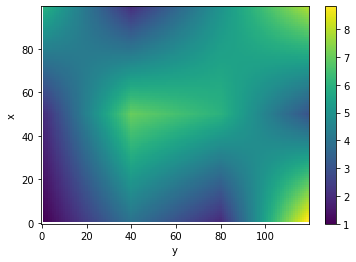

In [6]:
dset_interp.plot()

## Chunking dataset

In [5]:
dset_chunked = dset.chunk({"x": 1, "y": 1})
dset_chunked

<xarray.DataArray (x: 3, y: 4)>
dask.array<xarray-<this-array>, shape=(3, 4), dtype=int32, chunksize=(1, 1), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 1 50 100
  * y        (y) int32 1 40 80 120

In [6]:
dset_chunked.interp(x=x, y=y)

<xarray.DataArray (x: 100, y: 120)>
dask.array<dask_aware_interpnd, shape=(100, 120), dtype=float64, chunksize=(100, 120), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

## Chunking coordinates

In [7]:
x_chunked = x.chunk(10)
x_chunked

<xarray.DataArray (x: 100)>
dask.array<xarray-<this-array>, shape=(100,), dtype=int32, chunksize=(10,), chunktype=numpy.ndarray>
Dimensions without coordinates: x

In [8]:
y_chunked = y.chunk(10)
y_chunked

<xarray.DataArray (y: 120)>
dask.array<xarray-<this-array>, shape=(120,), dtype=int32, chunksize=(10,), chunktype=numpy.ndarray>
Dimensions without coordinates: y

In [9]:
dset.interp(x=x_chunked, y=y_chunked)

<xarray.DataArray (x: 100, y: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 1.        , 1.07692308, ..., 8.475     , 8.65      ,
        8.825     ],
       [       nan, 1.02040816, 1.09837781, ..., 8.36785714, 8.5377551 ,
        8.70765306],
       ...,
       [       nan, 5.76      , 5.67128205, ..., 7.502     , 7.568     ,
        7.634     ],
       [       nan, 5.84      , 5.74666667, ..., 7.593     , 7.662     ,
        7.731     ],
       [       nan, 5.92      , 5.82205128, ..., 7.684     , 7.756     ,
        7.828     ]])
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

## Chunking dataset and coordinates

In [10]:
dset_chunked.interp(x=x_chunked, y=y_chunked)

<xarray.DataArray (x: 100, y: 120)>
dask.array<dask_aware_interpnd, shape=(100, 120), dtype=float64, chunksize=(100, 120), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

## Using mapping on coordinate blocks

Using `apply_ufunc` with a dummy function, to see we could use it to broadcast on coordinates and do interpolation in each output block.

In [13]:
xr.apply_ufunc(
    lambda a, b: a + b,
    x_chunked,
    y_chunked,
    dask="parallelized",
)

/opt/nesi/CS400_centos7_bdw/Python/3.10.5-gimkl-2022a/lib/python3.10/site-packages/dask/array/gufunc.py:456: PerformanceWarning: Increasing number of chunks by factor of 10
  tmp = blockwise(


<xarray.DataArray (x: 100, y: 120)>
dask.array<transpose, shape=(100, 120), dtype=int64, chunksize=(10, 10), chunktype=numpy.ndarray>
Dimensions without coordinates: x, y

Broadcasting does work but it generates a lot of tasks (392), maybe we can do better by using Dask directly.

In [2]:
import dask.array as da
from scipy.interpolate import RegularGridInterpolator

In [12]:
xs = da.arange(100, chunks=10)
ys = da.arange(120, chunks=10)

da.map_blocks(lambda a, b: a + b, xs[:, None], ys, chunks=(10, 10))

dask.array<lambda, shape=(100, 120), dtype=int32, chunksize=(10, 10), chunktype=numpy.ndarray>

Now we have only 152 tasks, this is close to the optimal which should be 120 (10 chunks in xs and 12 chunks in y).

The next cell contains all the code needed to do the chunked interpolation using Dask arrays.

In [13]:
xs = da.arange(100, chunks=10)
ys = da.arange(120, chunks=10)

interpolator = RegularGridInterpolator(
    (dset.x.values, dset.y.values),
    dset.values,
    bounds_error=False,
    fill_value=np.NaN
)

def interp(x, y):
    xys = np.stack(np.meshgrid(x, y, indexing="ij"), axis=-1)
    return interpolator(xys)

dset_interp = da.map_blocks(interp, xs[:, None], ys, chunks=(10, 10))
dset_interp = xr.DataArray(dset_interp, dims=("x", "y"), coords={"x": xs, "y": ys})
dset_interp

<xarray.DataArray 'interp-cfa2eaa5ee8e720414f4d9f7208f53d4' (x: 100, y: 120)>
dask.array<interp, shape=(100, 120), dtype=float64, chunksize=(10, 10), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

This could probably be coded using `interp(x, y, interpolator)` and pass `interpolator` as a `kwargs` of `da.map_blocks`.
Passing it separately would allow to use `client.scatter` first on `interpolator` if this causes an I/O issue.

In [17]:
dset_interp.load()

<xarray.DataArray 'interp-ed4844364ce665ac1c921eb916199966' (x: 100, y: 120)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan, 1.        , 1.07692308, ..., 8.475     , 8.65      ,
        8.825     ],
       [       nan, 1.02040816, 1.09837781, ..., 8.36785714, 8.5377551 ,
        8.70765306],
       ...,
       [       nan, 5.76      , 5.67128205, ..., 7.502     , 7.568     ,
        7.634     ],
       [       nan, 5.84      , 5.74666667, ..., 7.593     , 7.662     ,
        7.731     ],
       [       nan, 5.92      , 5.82205128, ..., 7.684     , 7.756     ,
        7.828     ]])
Coordinates:
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

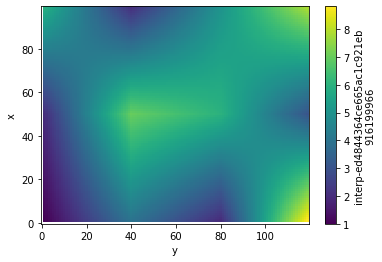

In [18]:
dset_interp.plot()

Trying with xarray chunked x and y

In [33]:
xs = da.arange(100, chunks=10)
ys = da.arange(120, chunks=10)

interpolator = RegularGridInterpolator(
    (dset.x.values, dset.y.values),
    dset.values,
    bounds_error=False,
    fill_value=np.NaN
)

def interp(x, y):
    xys = np.stack(np.meshgrid(x, y, indexing="ij"), axis=-1)
    return interpolator(xys)

dset_interp = da.map_blocks(interp, x.chunk(10).data[:, None], y.chunk(10).data)
dset_interp = xr.DataArray(dset_interp, dims=("x", "y"), coords={"x": x, "y": y})
dset_interp

<xarray.DataArray 'interp-b2db68d0976be45c1cd5c9864c33f422' (x: 100, y: 120)>
dask.array<interp, shape=(100, 120), dtype=float64, chunksize=(10, 10), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 0 1 2 3 4 5 6 7 8 ... 111 112 113 114 115 116 117 118 119

## Now defining image/rioxarray style

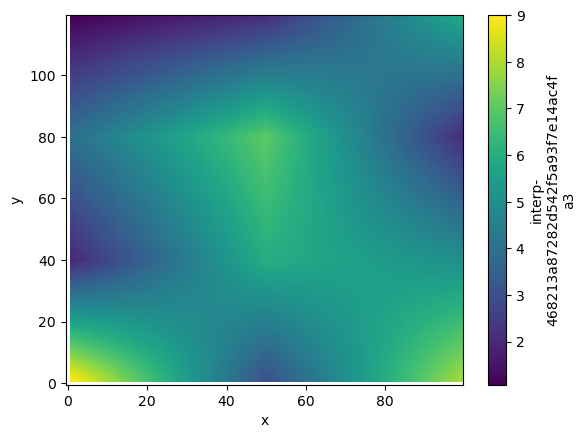

In [6]:
dset = xr.DataArray(
    data=np.array([[1, 4, 2, 9], [2, 7, 6, 3], [6, 2, 5, 8]]).transpose(),
    dims=("y", "x"),
    coords={"x": [1, 50, 100], "y": [120, 80, 40, 1]},
)
dset

x = xr.DataArray(data=np.arange(100), dims=["x"])
x

y = xr.DataArray(data=np.arange(120), dims=["y"])
y

interpolator = RegularGridInterpolator(
    (dset.y.values, dset.x.values),
    dset.values,
    bounds_error=False,
    fill_value=np.NaN
)

def interp(y, x):
    xys = np.stack(np.meshgrid(y, x, indexing="ij"), axis=-1)
    return interpolator(xys)

dset_interp = da.map_blocks(interp, y.chunk(10).data[:, None], x.chunk(10).data)

dset_interp = xr.DataArray(dset_interp, dims=("y", "x"), coords={"x": x, "y": y})
dset_interp

dset_interp.load()
dset_interp.plot()

## Or step by step

In [7]:
dset = xr.DataArray(
    data=np.array([[1, 4, 2, 9], [2, 7, 6, 3], [6, 2, 5, 8]]).transpose(),
    dims=("y", "x"),
    coords={"x": [1, 50, 100], "y": [120, 80, 40, 1]},
)
dset

<xarray.DataArray (y: 4, x: 3)>
array([[1, 2, 6],
       [4, 7, 2],
       [2, 6, 5],
       [9, 3, 8]])
Coordinates:
  * x        (x) int32 1 50 100
  * y        (y) int32 120 80 40 1

In [5]:
x = da.from_array(np.arange(100), chunks=10)
x

dask.array<array, shape=(100,), dtype=int32, chunksize=(100,), chunktype=numpy.ndarray>

In [87]:
x = xr.DataArray(data=np.arange(100), dims=["x"])
x

<xarray.DataArray (x: 100)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])
Dimensions without coordinates: x

In [88]:
y = xr.DataArray(data=np.arange(120, 0, -1), dims=["y"])
y

<xarray.DataArray (y: 120)>
array([120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108,
       107, 106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,  95,
        94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,  82,
        81,  80,  79,  78,  77,  76,  75,  74,  73,  72,  71,  70,  69,
        68,  67,  66,  65,  64,  63,  62,  61,  60,  59,  58,  57,  56,
        55,  54,  53,  52,  51,  50,  49,  48,  47,  46,  45,  44,  43,
        42,  41,  40,  39,  38,  37,  36,  35,  34,  33,  32,  31,  30,
        29,  28,  27,  26,  25,  24,  23,  22,  21,  20,  19,  18,  17,
        16,  15,  14,  13,  12,  11,  10,   9,   8,   7,   6,   5,   4,
         3,   2,   1])
Dimensions without coordinates: y

In [89]:
interpolator = RegularGridInterpolator(
    (dset.y.values, dset.x.values),
    dset.values,
    bounds_error=False,
    fill_value=np.NaN
)

In [101]:
x.chunk(10).chunks

((10, 10, 10, 10, 10, 10, 10, 10, 10, 10),)

In [96]:
def interp(y, x):
    xys = np.stack(np.meshgrid(y, x, indexing="ij"), axis=-1)
    return interpolator(xys)

dset_interp = da.map_blocks(interp, y.chunk(10).data[:, None], x.chunk(10).data)
dset_interp

dask.array<interp, shape=(120, 100), dtype=float64, chunksize=(10, 10), chunktype=numpy.ndarray>

In [91]:
dset_interp = xr.DataArray(dset_interp, dims=("y", "x"), coords={"x": x, "y": y})
dset_interp

<xarray.DataArray 'interp-eb1d8cfd469474ea7b56688e2f5630db' (y: 120, x: 100)>
dask.array<interp, shape=(120, 100), dtype=float64, chunksize=(10, 10), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) int32 0 1 2 3 4 5 6 7 8 9 10 ... 90 91 92 93 94 95 96 97 98 99
  * y        (y) int32 120 119 118 117 116 115 114 113 112 ... 9 8 7 6 5 4 3 2 1

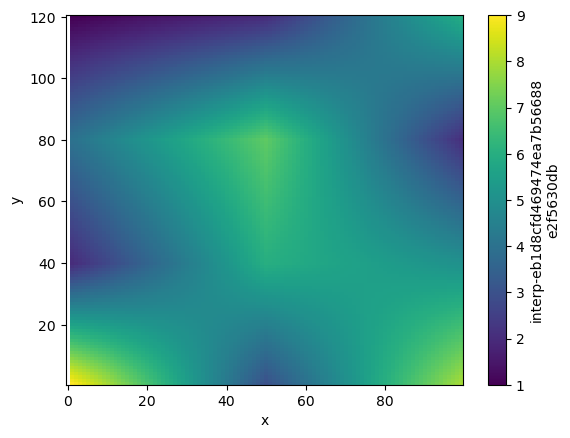

In [92]:
dset_interp.load()
dset_interp.plot()

In [93]:
np.meshgrid(y, x, indexing="ij")

[array([[120, 120, 120, ..., 120, 120, 120],
        [119, 119, 119, ..., 119, 119, 119],
        [118, 118, 118, ..., 118, 118, 118],
        ...,
        [  3,   3,   3, ...,   3,   3,   3],
        [  2,   2,   2, ...,   2,   2,   2],
        [  1,   1,   1, ...,   1,   1,   1]]),
 array([[ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        ...,
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99],
        [ 0,  1,  2, ..., 97, 98, 99]])]

In [94]:
np.stack(np.meshgrid(y, x, indexing="ij"), axis=-1)

array([[[120,   0],
        [120,   1],
        [120,   2],
        ...,
        [120,  97],
        [120,  98],
        [120,  99]],

       [[119,   0],
        [119,   1],
        [119,   2],
        ...,
        [119,  97],
        [119,  98],
        [119,  99]],

       [[118,   0],
        [118,   1],
        [118,   2],
        ...,
        [118,  97],
        [118,  98],
        [118,  99]],

       ...,

       [[  3,   0],
        [  3,   1],
        [  3,   2],
        ...,
        [  3,  97],
        [  3,  98],
        [  3,  99]],

       [[  2,   0],
        [  2,   1],
        [  2,   2],
        ...,
        [  2,  97],
        [  2,  98],
        [  2,  99]],

       [[  1,   0],
        [  1,   1],
        [  1,   2],
        ...,
        [  1,  97],
        [  1,  98],
        [  1,  99]]])

# With dask array blockwise

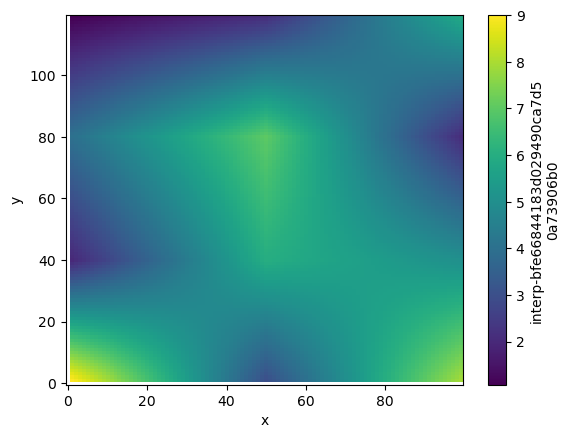

In [15]:
dset = xr.DataArray(
    data=np.array([[1, 4, 2, 9], [2, 7, 6, 3], [6, 2, 5, 8]]).transpose(),
    dims=("y", "x"),
    coords={"x": [1, 50, 100], "y": [120, 80, 40, 1]},
)
dset

xs = da.from_array(np.arange(100), chunks=300)
ys = da.from_array(np.arange(120), chunks=300)

interpolator = RegularGridInterpolator(
    (dset.y.values, dset.x.values),
    dset.values,
    bounds_error=False,
    fill_value=np.NaN
)

def interp(y, x):
    xys = np.stack(np.meshgrid(y, x, indexing="ij"), axis=-1)
    return interpolator(xys)

#dset_interp = da.map_blocks(interp, y.chunk(10).data[:, None], x.chunk(10).data)
dset_interp = da.blockwise(interp, "ij", ys, "i", xs, "j")

dset_interp = xr.DataArray(dset_interp, dims=("y", "x"), coords={"x": x, "y": y})
dset_interp

dset_interp.load()
dset_interp.plot()